## Diabetes Prediction Dataset

**Description:**

Welcome to the **Diabetes Prediction Dataset**, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

**Columns:**

- **Id:** Unique identifier for each data entry.
- **Pregnancies:** Number of times pregnant.
- **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- **BloodPressure:** Diastolic blood pressure (mm Hg).
- **SkinThickness:** Triceps skinfold thickness (mm).
- **Insulin:** 2-Hour serum insulin (mu U/ml).
- **BMI:** Body mass index (weight in kg / height in m^2).
- **DiabetesPedigreeFunction:** Diabetes pedigree function, a genetic score of diabetes.
- **Age:** Age in years.
- **Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [9]:
import os
print(os.path.exists(r'C:\Users\Pro\Downloads\Healthcare-Diabetes.csv'))  # يجب أن تُرجع True


True


In [10]:
df_di = pd.read_csv(r'C:\Users\Pro\Downloads\Healthcare-Diabetes.csv')

In [11]:
df_di.sample(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2497,2498,4,128,70,0,0,34.3,0.303,24,0
1050,1051,7,133,88,15,155,32.4,0.262,37,0
478,479,8,126,74,38,75,25.9,0.162,39,0
2553,2554,0,99,0,0,0,25.0,0.253,22,0
16,17,0,118,84,47,230,45.8,0.551,31,1
1539,1540,2,144,58,33,135,31.6,0.422,25,1
2106,2107,6,87,80,0,0,23.2,0.084,32,0
400,401,4,95,64,0,0,32.0,0.161,31,1
1963,1964,2,99,60,17,160,36.6,0.453,21,0
2605,2606,6,162,62,0,0,24.3,0.178,50,1


In [12]:
df_di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [13]:
df_di[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_di[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_di.isnull().sum())

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [14]:
df_di.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2750.0,121.895273,30.600655,44.000,99.000,117.000,141.000,199.00
BloodPressure,2643.0,72.404086,12.268576,24.000,64.000,72.000,80.000,122.00
SkinThickness,1968.0,29.289634,10.711518,7.000,22.000,29.000,36.000,110.00
Insulin,1438.0,154.237830,113.339578,14.000,76.250,126.000,190.000,846.00
BMI,2729.0,32.596665,7.154020,18.200,27.500,32.400,36.800,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [15]:
df_di.duplicated().sum()

0

# Data analysis & Feature engineer

In [16]:
df_di=df_di.drop('Id',axis = 1)

In [17]:
df_di['Glucose'] = df_di.groupby('Age')['Glucose'].transform(lambda x: x.fillna(x.median()))
df_di['BloodPressure'] = df_di.groupby('Age')['BloodPressure'].transform(lambda x: x.fillna(x.median()))
df_di['SkinThickness'] = df_di.groupby('Age')['SkinThickness'].transform(lambda x: x.fillna(x.median()))
df_di['BMI'] = df_di.groupby('Age')['BMI'].transform(lambda x: x.fillna(x.median()))


In [18]:
df_di[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_di[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_di.isnull().sum())

Pregnancies                    0
Glucose                        0
BloodPressure                  4
SkinThickness                 49
Insulin                     1330
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [19]:
features_drop = ['BloodPressure', 'SkinThickness']
df_di = df_di.dropna(subset=features_drop)

In [20]:
from sklearn.tree import DecisionTreeRegressor


df_not_null = df_di[df_di['Insulin'].notnull()]
df_null = df_di[df_di['Insulin'].isnull()]


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
X_train = df_not_null[features]
y_train = df_not_null['Insulin']


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

X_null = df_null[features]
predicted_insulin = model.predict(X_null)


df_di.loc[df_di['Insulin'].isnull(), 'Insulin'] = predicted_insulin

<Axes: >

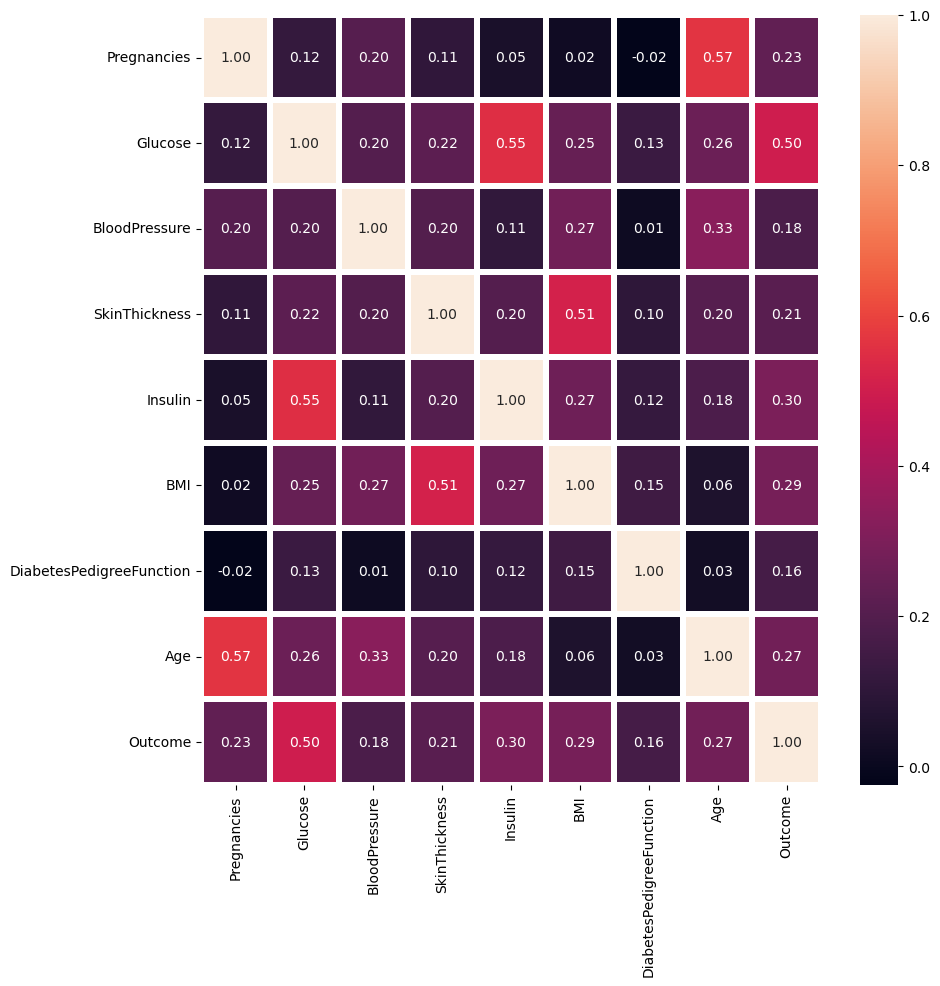

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df_di.corr() , annot = True,fmt = "0.2f",linewidths=4)

In [22]:
df_di.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Outcome', ylabel='count'>

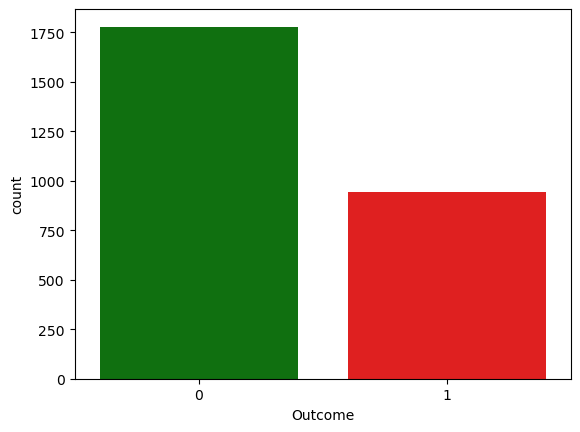

In [23]:
sns.countplot(x ='Outcome', data = df_di, palette = ['g','r'] )

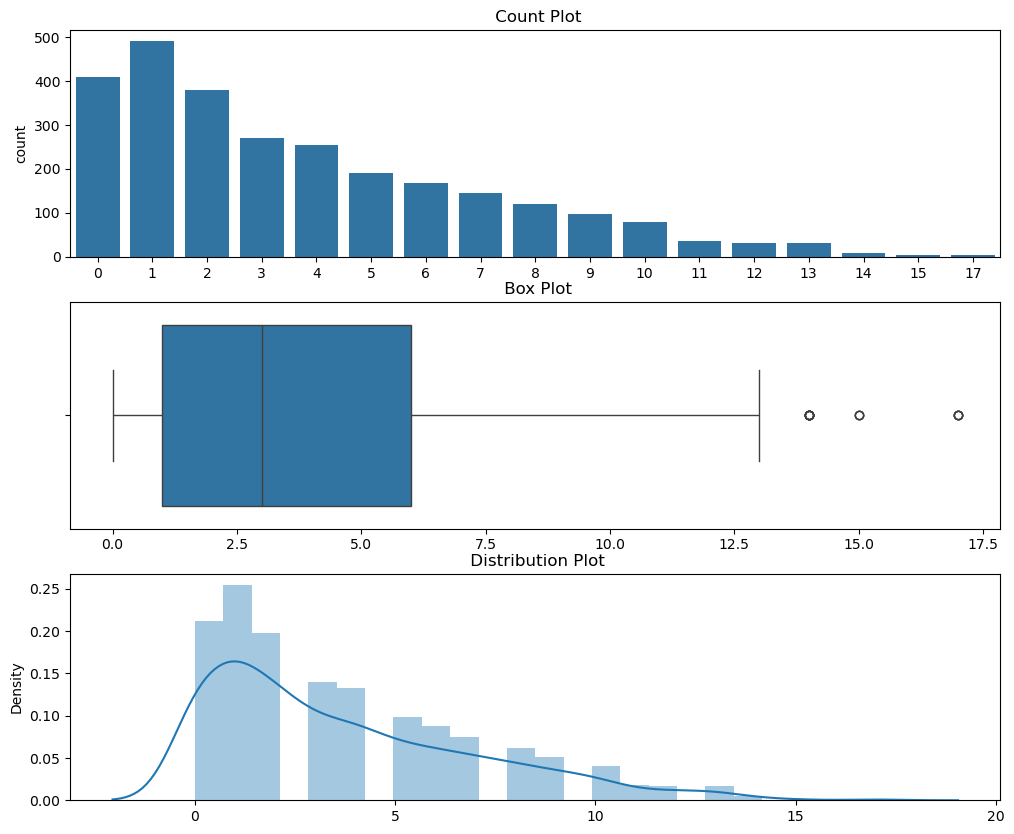

In [24]:
plt.figure(figsize = (12,10))
plt.subplot(3,1,1)
sns.countplot(x ='Pregnancies', data = df_di )
plt.title(' Count Plot')
plt.xlabel('')

plt.subplot(3,1,2)
sns.boxplot(x ='Pregnancies', data = df_di )
plt.title(' Box Plot')
plt.xlabel('')

plt.subplot(3,1,3)
sns.distplot(df_di['Pregnancies'] )
plt.title(' Distribution Plot')
plt.xlabel('')

plt.show()

In [25]:
def figure_con(x):
    
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.histplot(x = x, data = df_di)

    plt.subplot(1,2,2)
    sns.boxplot(x = x, data = df_di)

    return print('precntile 97.5% = ',np.quantile(df_di[x],0.975),',precntile 2.5% = ',np.quantile(df_di[x],0.025) )

precntile 97.5% =  60.0 ,precntile 2.5% =  21.0


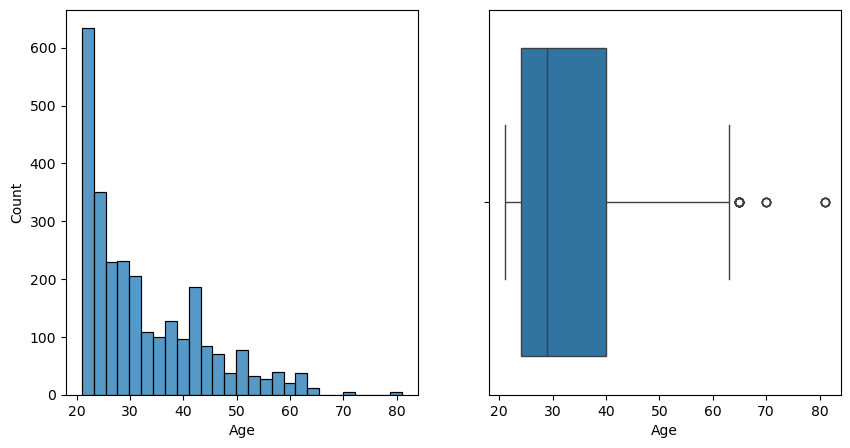

In [26]:
figure_con('Age')

precntile 97.5% =  4.0943445622221 ,precntile 2.5% =  3.044522437723423


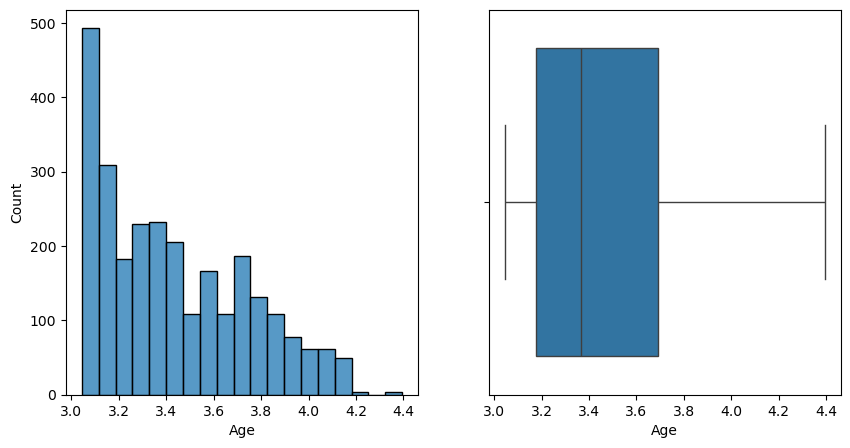

In [27]:
df_di['Age'] = np.log(df_di['Age'])
figure_con('Age')

precntile 97.5% =  188.0 ,precntile 2.5% =  74.0


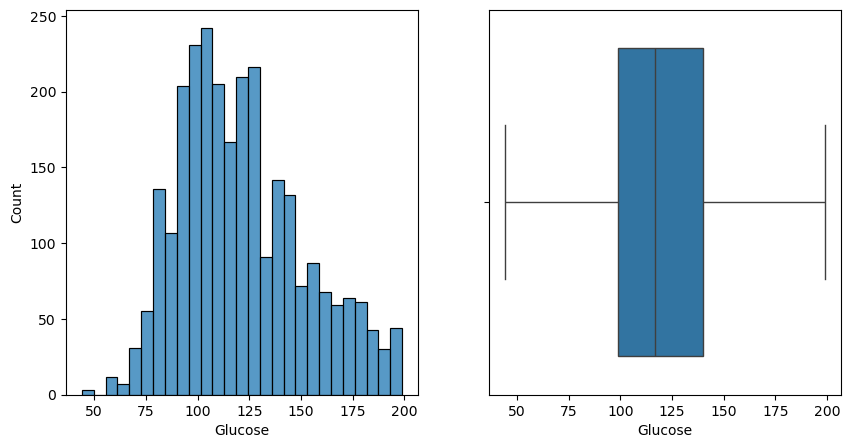

In [28]:
figure_con('Glucose')

precntile 97.5% =  188.0 ,precntile 2.5% =  74.0


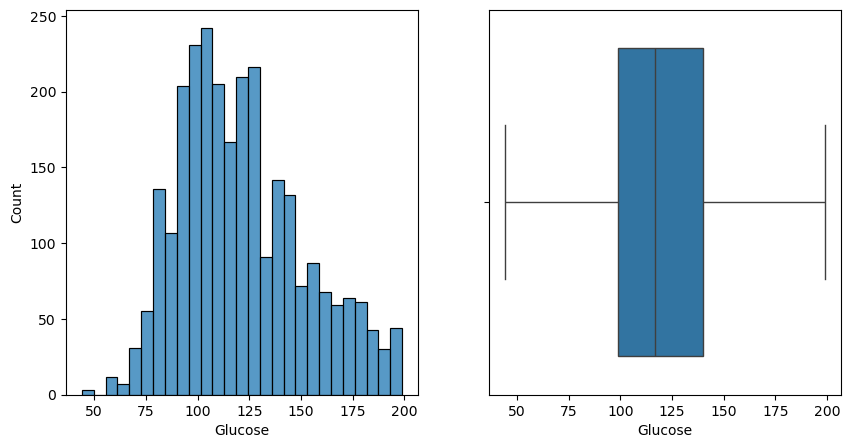

In [29]:
df_di =  df_di[df_di['Glucose'] > 20]
figure_con('Glucose')

precntile 97.5% =  98.0 ,precntile 2.5% =  50.0


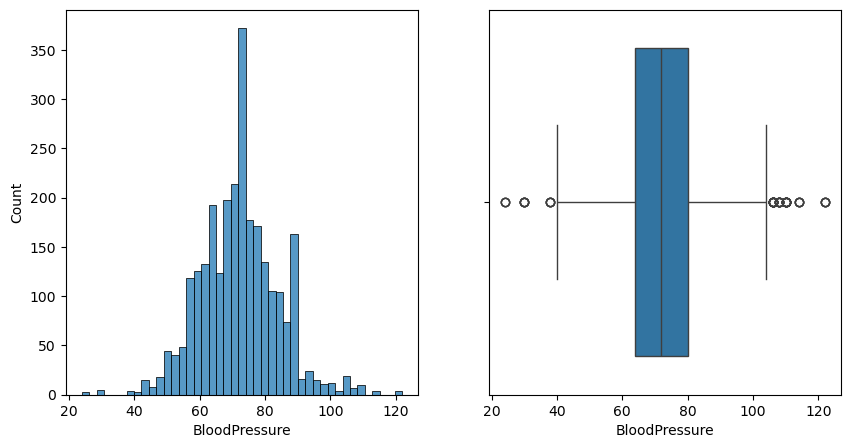

In [30]:
figure_con('BloodPressure')

precntile 97.5% =  96.0 ,precntile 2.5% =  50.0


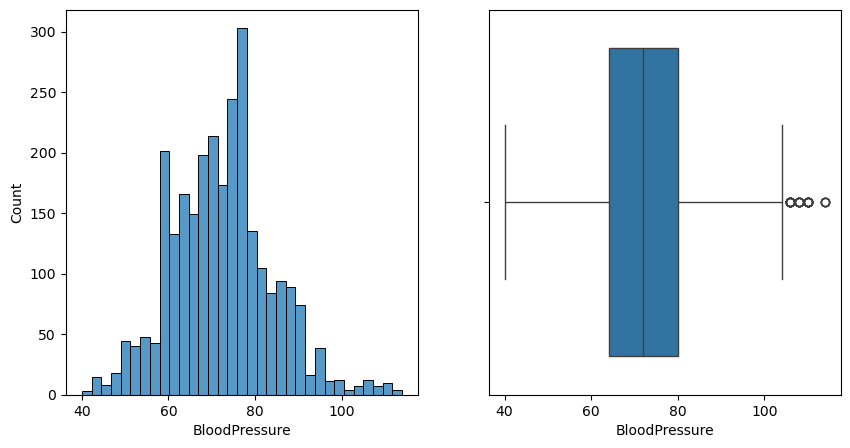

In [31]:
df_di =  df_di[(df_di['BloodPressure'] >= 40) & (df_di['BloodPressure']<=120)]
figure_con('BloodPressure')

precntile 97.5% =  48.0 ,precntile 2.5% =  12.0


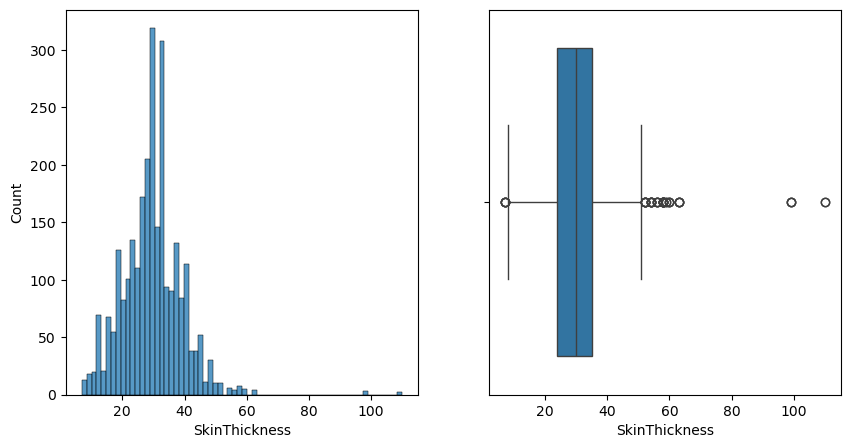

In [32]:
figure_con('SkinThickness')

precntile 97.5% =  48.0 ,precntile 2.5% =  12.0


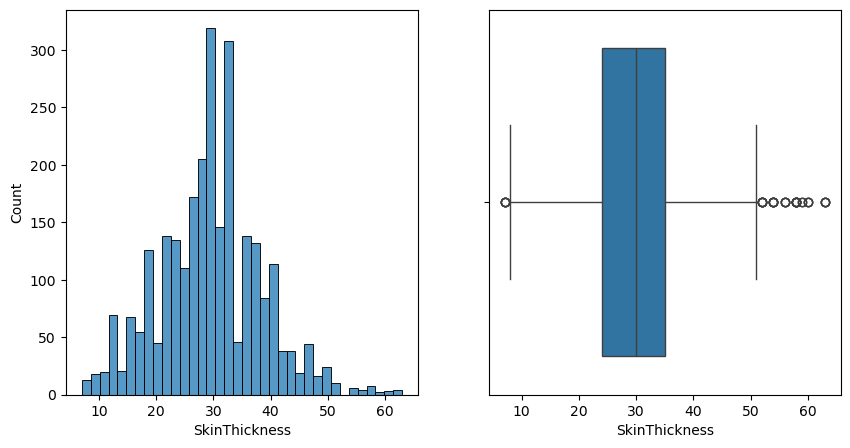

In [33]:
df_di = df_di[(df_di['SkinThickness'] >5) & (df_di['SkinThickness'] < 75)]

figure_con('SkinThickness')

In [34]:
df_di.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
524,3,125.0,58.0,28.5,130.0,31.6,0.151,3.178054,0
2133,5,162.0,104.0,27.0,90.0,37.7,0.151,3.951244,1
2259,1,80.0,74.0,11.0,60.0,30.0,0.527,3.091042,0
2449,0,135.0,94.0,46.0,145.0,40.6,0.284,3.258097,0
250,9,106.0,52.0,30.0,156.0,31.2,0.380,3.737670,0
2114,8,109.0,76.0,39.0,114.0,27.9,0.640,3.433987,1
2175,1,111.0,86.0,19.0,100.0,30.1,0.143,3.135494,0
1821,0,67.0,76.0,31.0,48.0,45.3,0.194,3.828641,0
1721,0,84.0,82.0,31.0,125.0,38.2,0.233,3.135494,0
777,2,89.0,90.0,30.0,54.0,33.5,0.292,3.737670,0


precntile 97.5% =  474.0 ,precntile 2.5% =  23.0


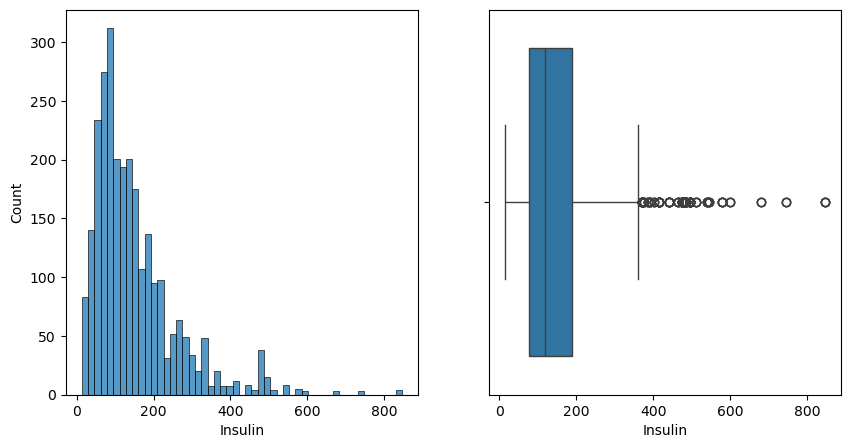

In [35]:
figure_con('Insulin')

precntile 97.5% =  6.161207321695077 ,precntile 2.5% =  3.1354942159291497


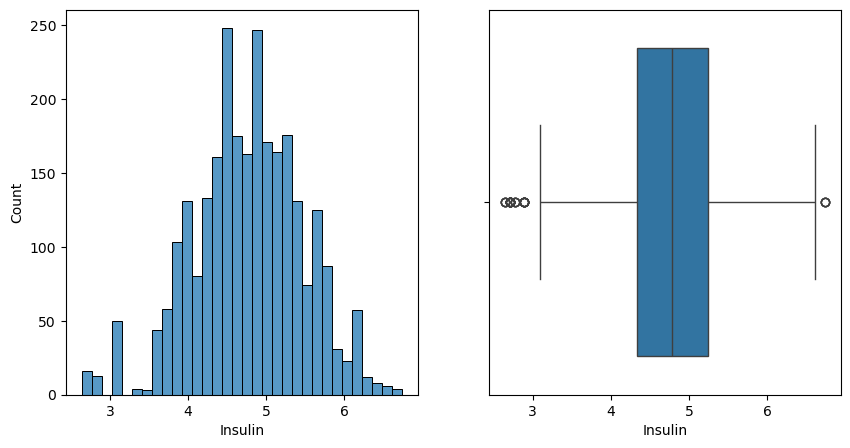

In [36]:
df_di['Insulin'] = np.log(df_di['Insulin'])
figure_con('Insulin')

precntile 97.5% =  46.8 ,precntile 2.5% =  21.0


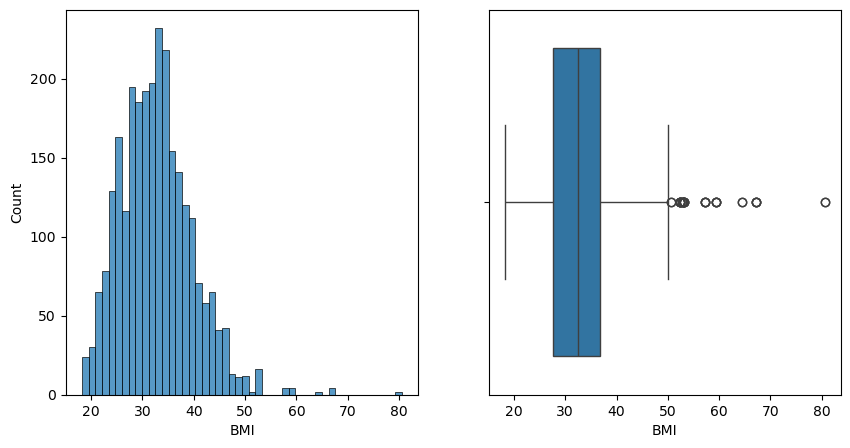

In [37]:
figure_con('BMI')

precntile 97.5% =  46.7625 ,precntile 2.5% =  21.0


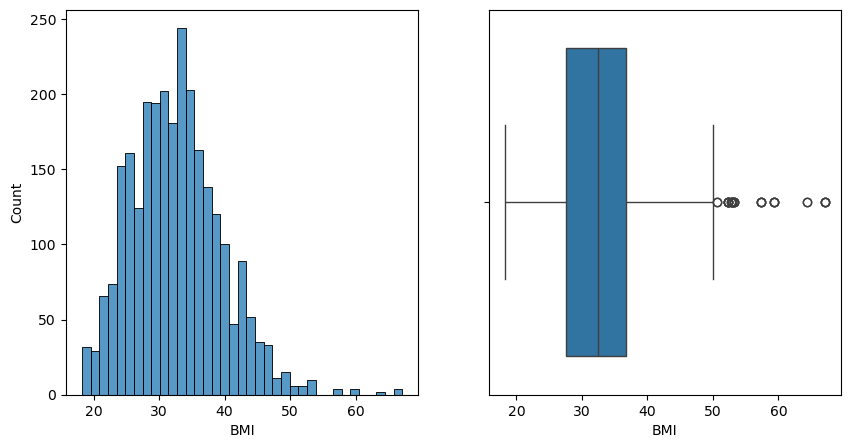

In [38]:
df_di = df_di[(df_di['BMI'] >5) & (df_di['BMI'] < 75)]
figure_con('BMI')

precntile 97.5% =  1.292 ,precntile 2.5% =  0.123


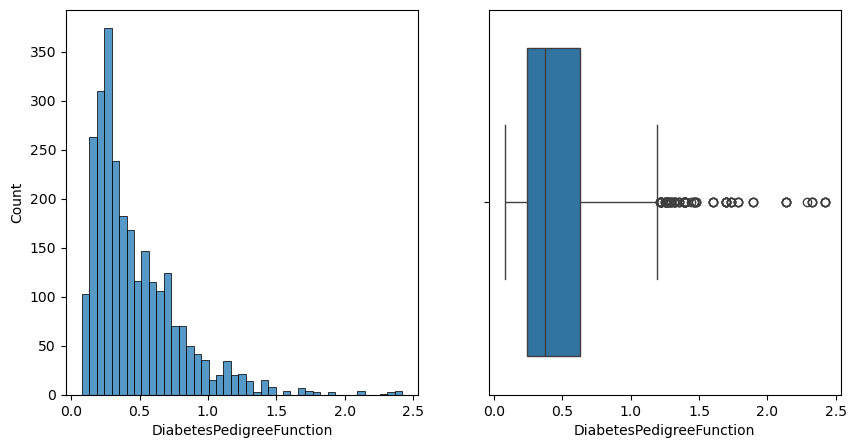

In [39]:
figure_con('DiabetesPedigreeFunction')

precntile 97.5% =  0.25619140536041013 ,precntile 2.5% =  -2.0955709236097197


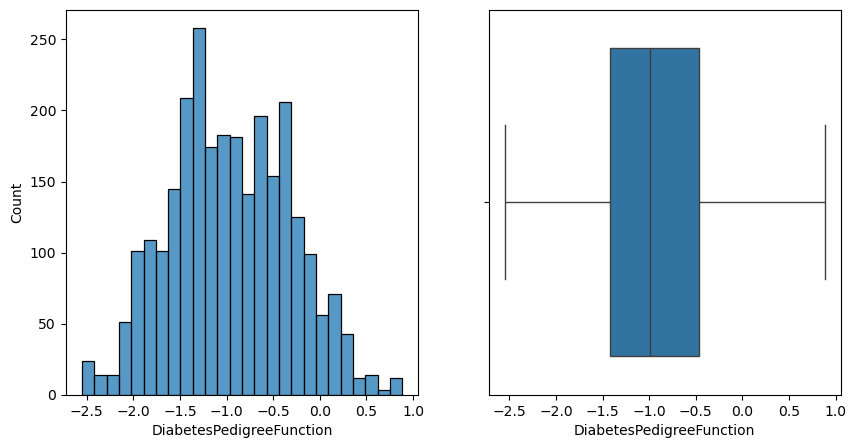

In [40]:
df_di['DiabetesPedigreeFunction'] = np.log(df_di['DiabetesPedigreeFunction'])
figure_con('DiabetesPedigreeFunction')

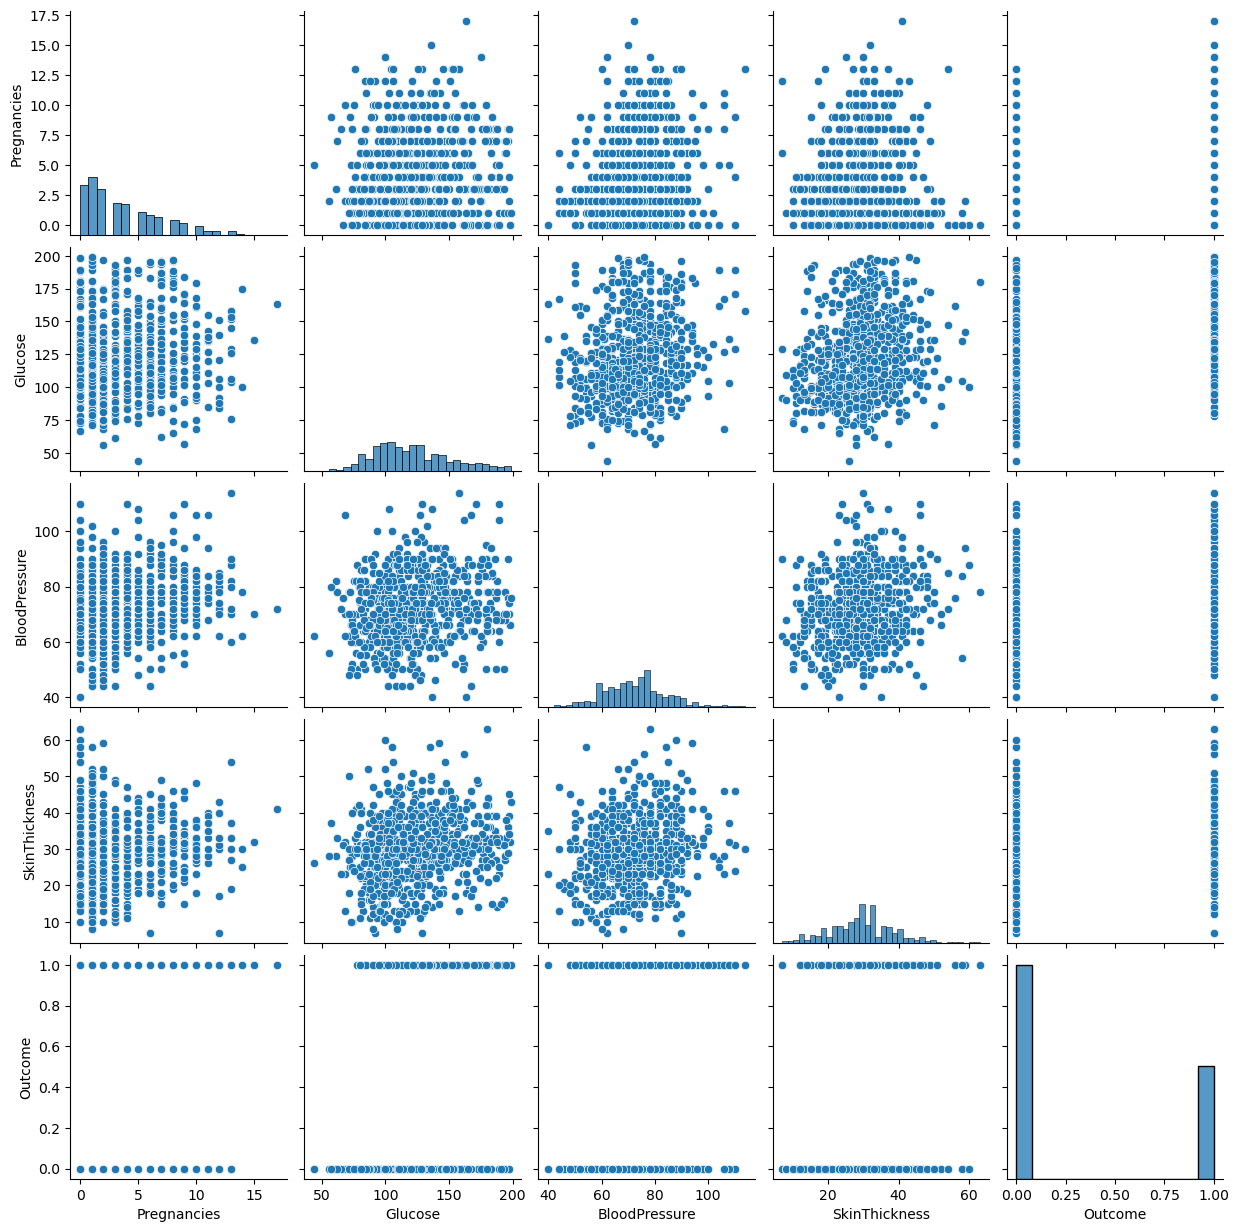

In [41]:
sns.pairplot(df_di[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Outcome']])

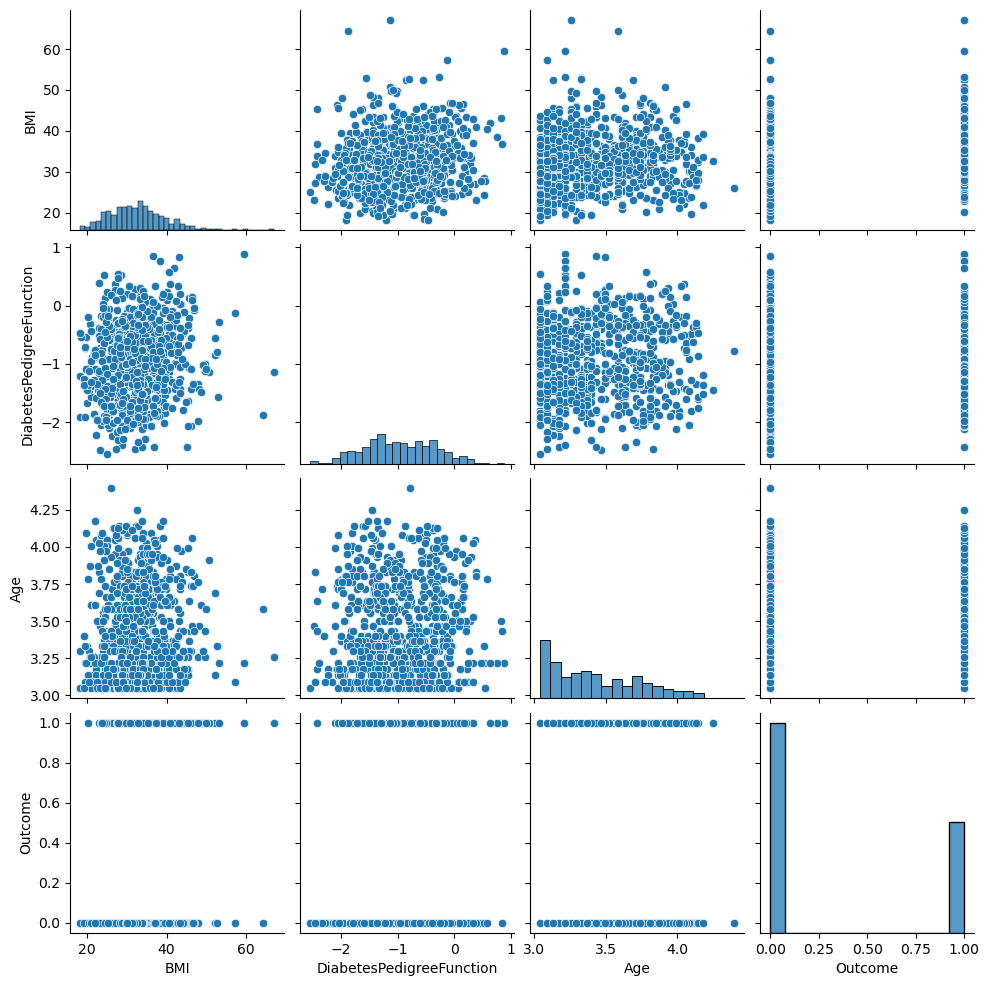

In [42]:
sns.pairplot(df_di[['BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

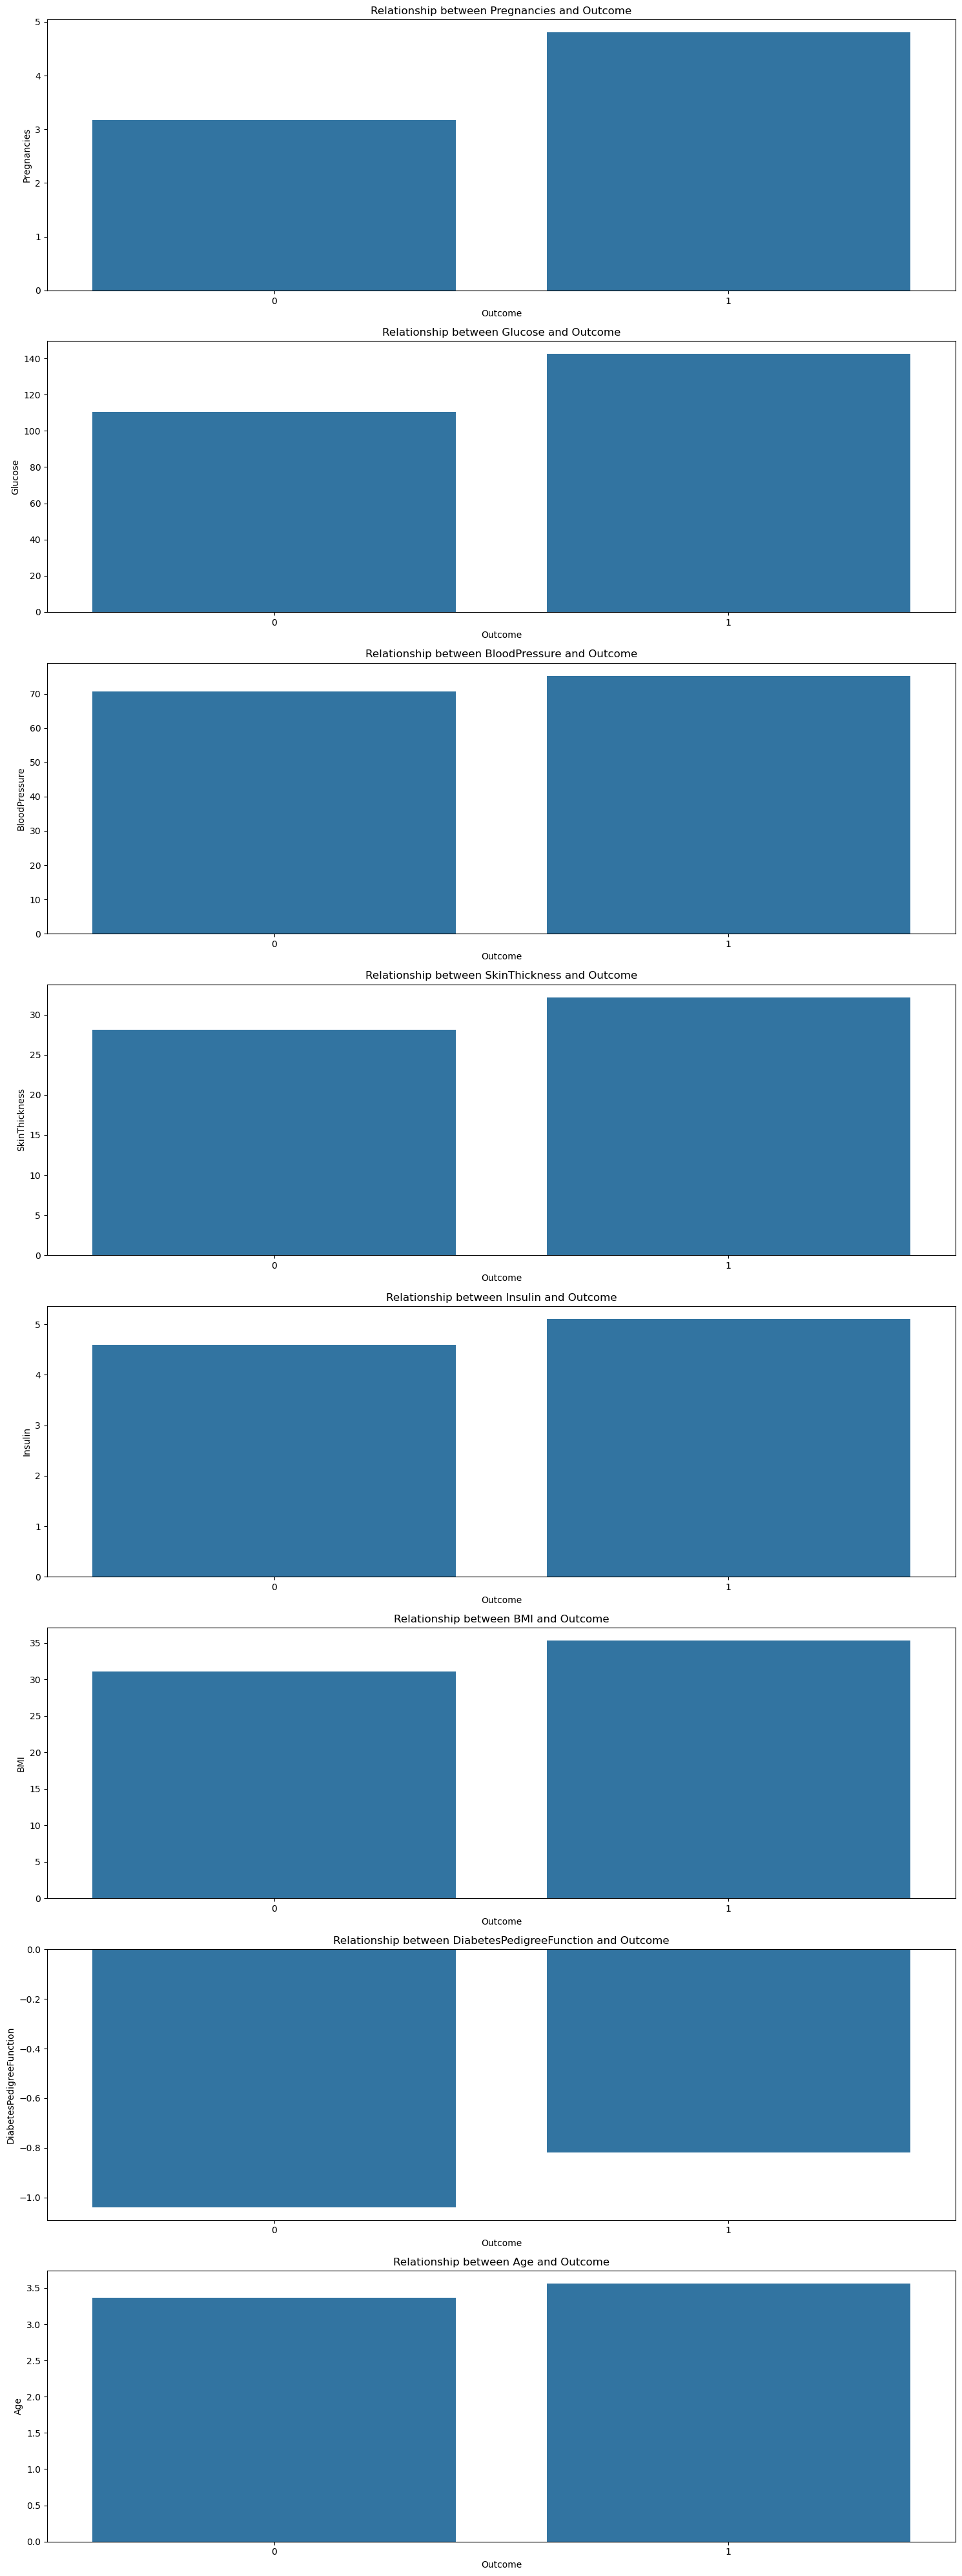

In [43]:
def plot_relationships(df, features, outcome):

    num_features = len(features)
    plt.figure(figsize=(15, 5 * num_features))

    for i, feature in enumerate(features):
        plt.subplot(num_features, 1, i + 1) 
        sns.barplot(x=outcome, y=feature, data=df, ci=None)  
        plt.title(f'Relationship between {feature} and {outcome}')
        plt.xlabel(outcome)
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome = 'Outcome'

plot_relationships(df_di, features, outcome)

# Model

In [44]:
df_di.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
823,1,73.0,50.0,10.0,3.688879,23.0,-1.394327,3.044522,0
201,1,138.0,82.0,31.0,5.605802,40.1,-1.443923,3.332205,0
817,7,105.0,68.0,28.5,4.219508,33.3,-1.187444,3.178054,0
126,3,120.0,70.0,30.0,4.905275,42.9,-0.794073,3.401197,0
2600,13,153.0,88.0,37.0,4.941642,40.6,0.160417,3.663562,0
52,5,88.0,66.0,21.0,3.135494,24.4,-1.072945,3.401197,0
1770,8,186.0,90.0,35.0,5.416100,34.5,-0.860383,3.610918,1
2467,3,174.0,58.0,22.0,5.267858,32.9,-0.522561,3.583519,1
789,7,94.0,64.0,25.0,4.369448,33.3,-0.303811,3.713572,0
2418,0,131.0,66.0,40.0,4.343805,34.3,-1.629641,3.091042,1


In [45]:
df_di.shape

(2696, 9)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_di.drop('Outcome', axis=1)  # استبدل 'Outcome' بالعمود الذي يمثل الهدف في بياناتك
y = df_di['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9925925925925926
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       362
           1       0.98      1.00      0.99       178

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



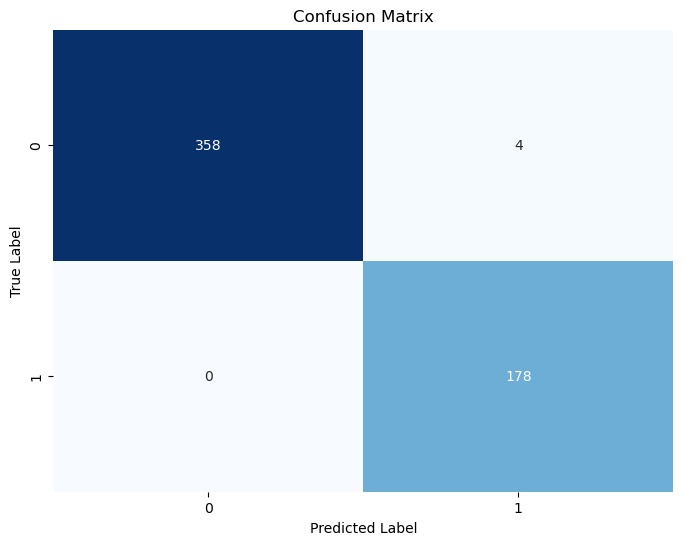

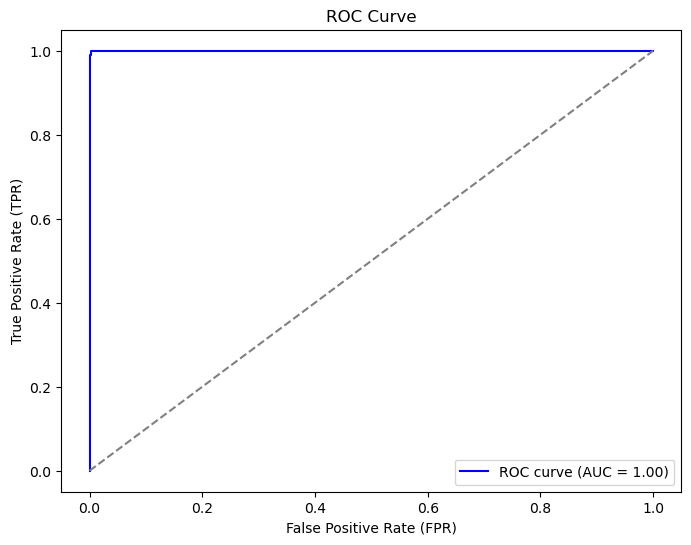

In [47]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # الحصول على احتمالات التصنيف الإيجابي فقط

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [56]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

In [57]:
import os
print(os.getcwd())


C:\Users\Pro


In [64]:
pip install nest_asyncio

In [75]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import nest_asyncio

nest_asyncio.apply()

model = joblib.load(r"C:\Users\Pro\rf_model.pkl")

app = FastAPI()

class DiabetesData(BaseModel):
    pregnancies: int
    glucose: float
    blood_pressure: float
    skin_thickness: float
    insulin: float
    bmi: float
    diabetes_pedigree: float
    age: int

@app.post("/predict")
def predict(data: DiabetesData):
    features = np.array([[data.pregnancies, data.glucose, data.blood_pressure, data.skin_thickness,
                          data.insulin, data.bmi, data.diabetes_pedigree, data.age]])
    
    prediction = model.predict(features)
    result = "Diabetic" if prediction[0] == 1 else "Non-Diabetic"
    
    return {"prediction": result}

@app.get("/")
def read_root():
    return {"message": "Welcome to the Diabetes Prediction API!"}
    

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8030)


INFO:     Started server process [1164]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8030 (Press CTRL+C to quit)


INFO:     127.0.0.1:59454 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:59454 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:59455 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:59455 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:59629 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:59630 - "GET /predict/docs HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59630 - "GET /predict/docs HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59695 - "GET /docs/predict HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59695 - "GET /docs/predict HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59812 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:60419 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1164]
